In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Bengaluru_House_Data.csv")

In [91]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [92]:
df.shape

(13320, 9)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [94]:
# calculate the null values
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [95]:
df.drop(columns = ['area_type', 'availability', 'society', 'balcony'], inplace = True)

In [96]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [98]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [99]:
df['location'] = df['location'].fillna('Sarjapur  Road')

In [100]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [101]:
df['size'] = df['size'].fillna('2 BHK')

In [102]:
df['bath'] = df['bath'].fillna(df['bath'].median())

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [104]:
df['bhk'] = df['size'].str.split().str.get(0).astype(int)

In [105]:
df[df.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [106]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [107]:
def convertRange(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1])) / 2
    try:
        return float(x)
    except ValueError:
        return None


In [108]:
df['total_sqft'] = df['total_sqft'].apply(convertRange)

In [109]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


Price per sq feet

In [110]:
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

In [111]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [112]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    400
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [113]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_count = df['location'].value_counts()

In [114]:
location_count_less_10 = location_count[location_count <= 10]

In [115]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [116]:
df['location'].value_counts()

location
other                 2885
Whitefield             541
Sarjapur  Road         400
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

Outliers removal

In [117]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [118]:
df = df[(df['total_sqft']/df['bhk']) >= 300]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [119]:
df.drop(columns = ["size", "price_per_sqft"], inplace = True)

In [120]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [121]:
df.to_csv("cleaned_data.csv")

In [122]:
data = pd.read_csv("cleaned_data.csv")

In [123]:
data

,Unnamed: 0,location,total_sqft,bath,price,bhk
0,0,Electronic City Phase II,1056.0,2.0,39.07,2
1,1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,2,Uttarahalli,1440.0,2.0,62.00,3
3,3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
12525,13315,Whitefield,3453.0,4.0,231.00,5
12526,13316,other,3600.0,5.0,400.00,4
12527,13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
12528,13318,Padmanabhanagar,4689.0,4.0,488.00,4


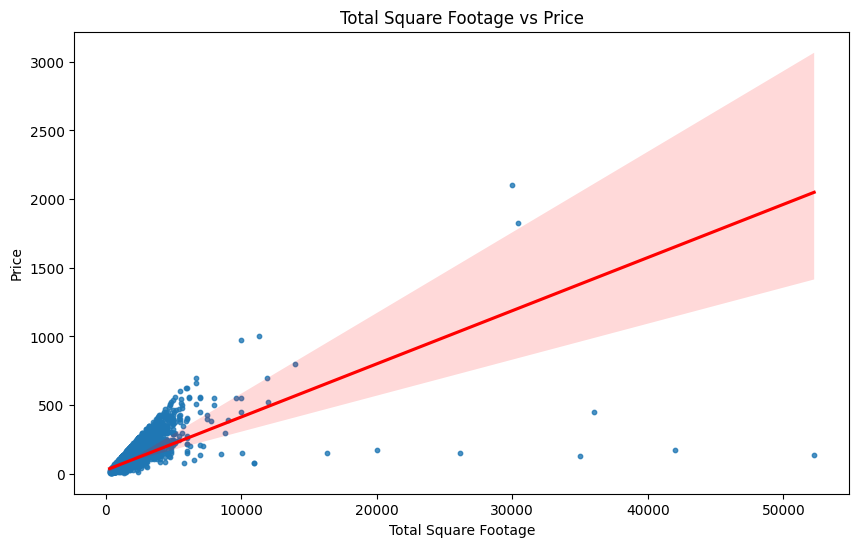

In [124]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.regplot(x='total_sqft', y='price', data=df_cleaned, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Total Square Footage vs Price')
plt.xlabel('Total Square Footage')
plt.ylabel('Price')
plt.show()

In [125]:
X = data.drop(columns = ['price', 'location']);
y = data['price']

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [129]:
y_pred = model.predict(X_test)

In [130]:
X_test

,Unnamed: 0,total_sqft,bath,bhk
7488,7987,1540.0,2.0,3
3776,4014,1141.0,2.0,2
6243,6657,2400.0,3.0,3
6123,6526,1275.0,3.0,3
4714,5011,1067.0,2.0,2
...,...,...,...,...
2664,2832,1243.0,2.0,2
6518,6946,1027.0,2.0,2
10685,11361,1200.0,3.0,2
6245,6659,2500.0,5.0,4


In [131]:
y_test

7488      78.00
3776      49.00
6243     120.00
6123      44.00
4714      60.00
          ...  
2664      46.00
6518      68.62
10685     78.00
6245     350.00
7381     147.00
Name: price, Length: 2506, dtype: float64

In [132]:
sample_data = X_test.iloc[0] 
predicted_price = model.predict([sample_data])
print("Predicted Price:", predicted_price)

Predicted Price: [83.9833506]


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
